In [14]:
import pandas as pd
import numpy as np

In [48]:
from matplotlib import pyplot as plt
import seaborn as sns

%matplotlib inline

In [15]:
filename = "DC_Properties.csv"
df = pd.read_csv(filename)

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2698: DtypeWarning: Columns (18,19,20,21,22,23,24,33,34,35,37,43,45) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [16]:
# find missing data
df_missing = df.copy()
missing = df_missing.isnull().sum()

In [17]:
# restrict our dataset to the following data columns: BATHRM, HEAT, AC, BEDRMN, PRICE, FULLADDRESS, WARD, QUADRANT
small_df = pd.DataFrame(data = df, columns=['BATHRM', 'HEAT', 'AC', 'BEDRM', 'PRICE', 'FULLADDRESS', 'WARD', 'QUADRANT'])
# small_df.head()

In [18]:
# remove all rows with NaN in the price column.
no_missing_df = small_df.copy().dropna()
# no_missing_df.shape

In [19]:
# by counting all the not null entries AND calling shape on our dataset,
# we can confirm that there are no blanks anywhere in this current dataset
# no_missing_df.notnull().count()
# no_missing_df.dtypes

In [20]:
# Just curious to see, what are the unique possible values for AC?
no_missing_df['AC'].unique() # we find that there are properties with an AC value of 0, which doesn't really make sense to us...
no_missing_df.loc[no_missing_df['AC'] == '0'].count() # and we know that there are only 16 such entries, ...
no_missing_df = no_missing_df.drop(no_missing_df[no_missing_df['AC'] == '0'].index) # so we feel unworried about removing these entries to further tighten up our dataset
# take-away here is that we MUST NOT FORGET when dropping rows/entries to use ".index" in the drop parameters
# let's confirm that the result of the above line gives up only 2 unique AC values now
# no_missing_df['AC'].unique()

In [21]:
# since Avi wants to live in this type of place (cheap first, good neighborhood 2nd, at least 2 bedroom, 1 bath, under $1500/month.)
# let's first bin the price ranges of places to live...
# before we can effectively bin, we should first describe the dataset to get an idea of the general data distribution


In [22]:
# outstanding questions
# How do we display dates as dates in Jupyter Notebooks?
# How can we filter (condense) the dataset to include sale dates within only the last X years, Y months, Z days, etc.?
# How can we render/display prices in a more human readable output such as $10B, or $200K, etc.?
# As it appears that there was a sale for $1 which seems dubious/suspect, how can we select & show the cheapest properities by sale price? (we are guessing sort & head)
# no_missing_df ['PRICE'].min()

In [23]:
# no_missing_df.tail(15)

In [29]:
#no_missing_df.head(15)
no_missing_df.shape

(57448, 8)

In [39]:
# remove outlier data using 1 of 2 methods (std or interquartile)
mean = no_missing_df['PRICE'].mean()
std = no_missing_df['PRICE'].std()
toprange = mean + std * 1.96
botrange = mean - std * 1.96

df2 = no_missing_df.copy() #to not mess up the original df
df2 = df2.drop(df2[df2['PRICE'] > toprange].index)
df2 = df2.drop(df2[df2['PRICE'] < botrange].index)

# df2.shape
# df2.dtypes
# df2.head()
# print(df2['HEAT'].unique())

['Warm Cool' 'Hot Water Rad' 'Forced Air' 'Elec Base Brd' 'Ht Pump'
 'Wall Furnace' 'Water Base Brd' 'Electric Rad' 'Air Exchng' 'Evp Cool'
 'No Data' 'Ind Unit' 'Gravity Furnac' 'Air-Oil']


In [47]:
# we want to be able to associate property data w/ locations,
# and by using lat/long we could more concisely/compactly hold such info

#create column based on binary conditional
df2['AC_BINARY'] = np.where(df2['AC']=="Y", 1, 0)
# df2.head()

# we've decided to ignore HEAT and include EAST, WEST, NORTH & SOUTH
# our intention is use the cordinal directions as is, but, just for now
# we will use the 4 diagonal directions as they are already included
# NE, SE, SW, NW (as the clock turns, clockwise)

def quandrant_to_numeric(q):
    if q=='NE':
        return 1
    elif q=='SE':
        return 2
    elif q=='SW':
        return 3
    elif q=='NW':
        return 4
    else:
        return -1
    
# NORTH will be returned as 0, SOUTH will be returned as 1
def ns_to_binary(q):
    if q=='NE' or q=='NW':
        return 0
    elif q=='SE' or q=='SW':
        return 1
    else:
        return -1
    
# EAST will be returned as 0, WEST will be returned as 1
def ew_to_binary(q):
    if q=='NE' or q=='SE':
        return 0
    elif q=='NW' or q=='SW':
        return 1
    else:
        return -1
    
df2['REGION'] = df2['QUADRANT'].apply(quandrant_to_numeric)
df2['NS'] = df2['QUADRANT'].apply(ns_to_binary)
df2['EW'] = df2['QUADRANT'].apply(ew_to_binary)
# print(df2['REGION'].unique())
# print(df2['NS'].unique())
# print(df2['EW'].unique())
# df2.head()
# df2.tail()

df2.corr()

,BATHRM,BEDRM,PRICE,AC_BINARY,REGION,NS,EW
BATHRM,1.000000,0.598232,0.465210,0.232147,0.211749,-0.111038,0.220261
BEDRM,0.598232,1.000000,0.314596,0.049857,0.212501,-0.129511,0.219689
PRICE,0.465210,0.314596,1.000000,0.300893,0.372961,-0.230400,0.388273
AC_BINARY,0.232147,0.049857,0.300893,1.000000,0.013467,0.023452,0.007372
REGION,0.211749,0.212501,0.372961,0.013467,1.000000,-0.223540,0.960707
NS,-0.111038,-0.129511,-0.230400,0.023452,-0.223540,1.000000,-0.444037
EW,0.220261,0.219689,0.388273,0.007372,0.960707,-0.444037,1.000000


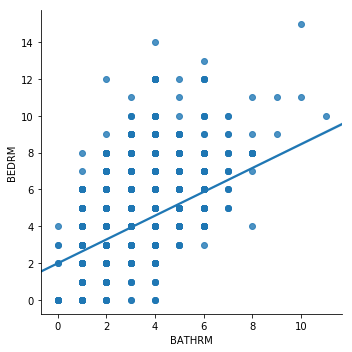

In [51]:
#make a scatterplot
sns.lmplot(x='BATHRM', y='BEDRM', data=df2)
# question: why are some data points rendered as circles, and others as squares?

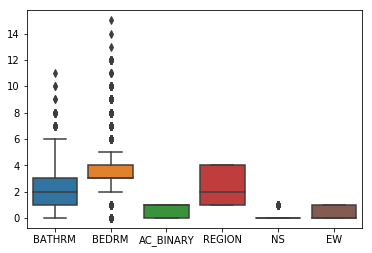

In [54]:
copydf2 = df2.copy()
copydf2 = copydf2.drop(['PRICE'], axis=1)
sns.boxplot(data=copydf2)

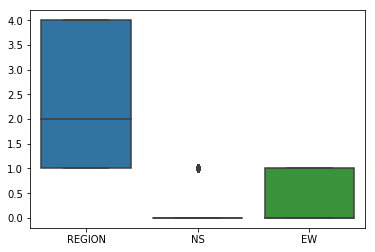

In [56]:
copydf3 = copydf2.copy()
copydf3 = copydf3.drop(['BATHRM','BEDRM','AC_BINARY'], axis=1)
sns.boxplot(data=copydf3)

In [57]:
print(pd.value_counts(copydf3['NS']))

0    43439
1    12317
Name: NS, dtype: int64


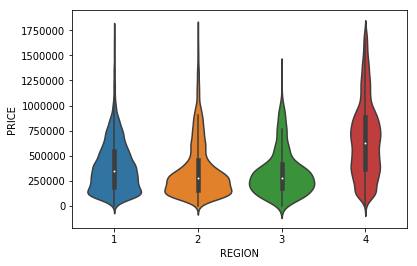

In [61]:
sns.violinplot(x='REGION', y='PRICE', data=df2)

# observations

It seems that in region 4 (NW) there is a more narrow (double-check that this is the correct way of saying) distribution of of prices where there are substantially expensive and inexpensive properties along the price range. Regions 1, 2, and 3 all are bottom heavy in distribution (they tend to be lower in price).


In [64]:
#use this library to build a statistical test for linear regression
import statsmodels.formula.api as smf

In [66]:
# we want to predict the price of a property by a range of factors, and also see, which factors seem to be most strongly correlated with price variation.
result = smf.ols(formula='PRICE ~ BATHRM + BEDRM + AC_BINARY - 1', data=df2).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  PRICE   R-squared:                       0.762
Model:                            OLS   Adj. R-squared:                  0.762
Method:                 Least Squares   F-statistic:                 5.940e+04
Date:                Wed, 20 Mar 2019   Prob (F-statistic):               0.00
Time:                        16:46:44   Log-Likelihood:            -7.8291e+05
No. Observations:               55756   AIC:                         1.566e+06
Df Residuals:                   55753   BIC:                         1.566e+06
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
BATHRM      1.306e+05   1683.774     77.588      0.000    1.27e+05    1.34e+05
BEDRM       3.199e+04   1107.269     28.888      0.000    2.98e+04    3.42e+04
AC_BINARY   1.708e+05   2732.486     62.517      0.000    1.65e+05    1.76e+05
==============================================================================
Omnibus:                     3435.496   Durbin-Watson:                   1.174
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4188.508
Skew:                           0.619   Prob(JB):                         0.00
Kurtosis:                       3.520   Cond. No.                         9.24
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""